In [1]:
#Linear Regression
from sklearn.datasets import fetch_california_housing

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
#we can use randomforestregreesor instead of linearregression and improve the performace just change the model name at the initialize
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=fetch_california_housing()

In [4]:
type(df)

sklearn.utils._bunch.Bunch

In [5]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
#load Dataset
df=fetch_california_housing(as_frame=True)
dataset=df.frame
#as_frame and .frame changes from utils.bunch datatype to dataframe
#otherwise we have to do pd.dataframe(df) to convert to dataframe


In [7]:
type(dataset)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
##Dividing the dataset into independent and dependent features or we say features and target
X=dataset.iloc[:,:-1]#all rows and columns except last column
y=dataset.iloc[:,-1]#only last column

#or we can do as 
#X = df.drop("MedHouseVal", axis=1)
#y = df["MedHouseVal"]

In [9]:
#spliting data in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=18)

In [10]:
#Initialize 
lin_reg = LinearRegression()
# lin_reg = RandomForestRegressor()


In [12]:
# Optional:Cross-validation on Training Set
cv_scores = cross_val_score(lin_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation nmse Scores:", cv_scores)
print("Average nmse Score:", cv_scores.mean())

Cross-Validation nmse Scores: [-0.50469375 -0.55191601 -0.51272868 -0.51510989 -0.51605163]
Average nmse Score: -0.5200999934485717


In [13]:
#Train the model
lin_reg.fit(X_train, y_train)

LinearRegression()

In [14]:
#Make predictions
y_pred= lin_reg.predict(X_test)

In [15]:
#Evaluate the model
mse=mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 score:", r2)

Mean Squared Error: 0.554959963250333
R2 score: 0.5721265340129744


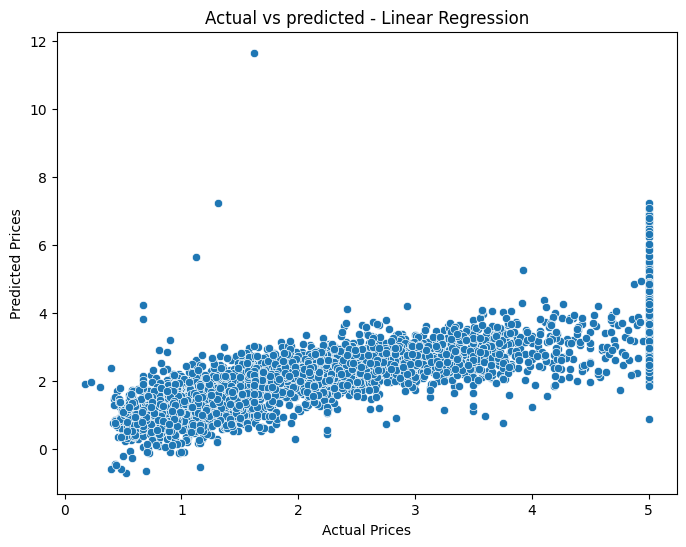

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs predicted - Linear Regression")
plt.show()


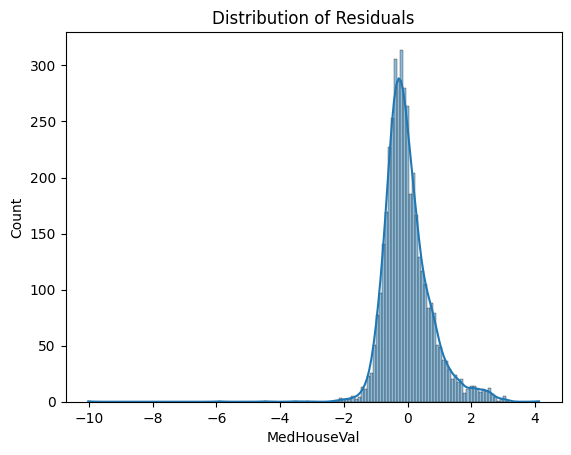

In [17]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

In [19]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [26]:
ridge=Ridge()

params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,35,40,45,50,60,70,80,100]}
ridge_regressor = GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 35, 40, 45, 50, 60, 70, 80, 100]},
             scoring='neg_mean_squared_error')

In [27]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-0.5204102013156808


In [28]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,35,40,45,50,60,70,80,100]}



In [29]:
lasso_regressor = GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=10)
lasso_regressor.fit(X_train,y_train)

C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.015e+02, tolerance: 2.000e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.443e+03, tolerance: 1.988e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 35, 40, 45, 50, 60, 70, 80, 100]},
             scoring='neg_mean_squared_error')

In [30]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)


{'alpha': 0.001}
-0.5204427536450721
